# Amazon Prime Video – Exploratory Data Analysis

## 1. Business Objective
The objective of this project is to perform Exploratory Data Analysis (EDA)
on Amazon Prime Video content to understand content distribution, popular
genres, ratings, languages, and release trends over time.

The insights derived from this analysis can support data-driven decisions
related to content strategy, regional focus, and platform growth.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

## 2.Dataset Loading
The dataset contains information about movies and TV shows available
on Amazon Prime Video.


In [6]:
file_path = "data/amazon_prime_titles.csv"
df = pd.read_csv("D:\\Amazon_prime_EDA\\amazon_prime_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## 3. Dataset Overview
Understanding the structure, size, and data types of the dataset.


In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:")
print(df.columns)

print("\nDataset Info:")
df.info()


Shape of dataset: (9668, 12)

Column Names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


## 4. Data Quality Checks
Checking for missing values and duplicate records before analysis.


In [35]:
print("Missing Values:")
df.isnull().sum()

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:

Duplicate Rows: 0


## 5. Data Cleaning
- Remove duplicate records
- Handle missing values
- Convert date columns to proper formats


In [33]:
df.drop_duplicates(inplace=True)


fill_cols = ['director', 'cast', 'country']
for col in fill_cols:
    df[col].fillna('Unknown', inplace=True)

df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['release_year'] = df['release_year'].astype(int)


df.isnull().sum()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4816\3289290466.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4816\3289290466.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

## 6. Content Type Distribution
Analyzing the proportion of Movies and TV Shows on Amazon Prime.


In [10]:
df['type'].value_counts()


type
Movie      7814
TV Show    1854
Name: count, dtype: int64

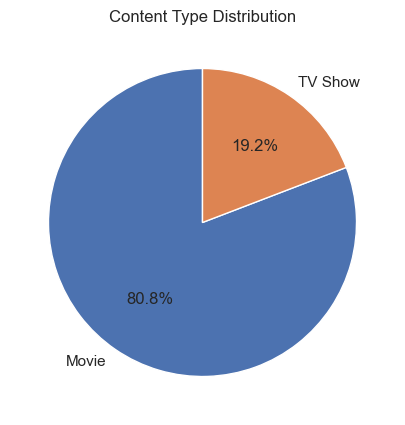

In [40]:
plt.figure(figsize=(6,5))
df['type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Content Type Distribution")
plt.ylabel("")
plt.show()


### Insight:
Movies dominate the Amazon Prime content library, indicating a stronger
focus on movie-based content compared to TV shows.


## 7. Genre Analysis
Identifying the most common genres available on the platform.


In [12]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

top_genres


listed_in
Drama               3687
Comedy              2099
Action              1657
Suspense            1501
Kids                1085
Documentary          993
Special Interest     980
Horror               875
Romance              674
Animation            547
Name: count, dtype: int64

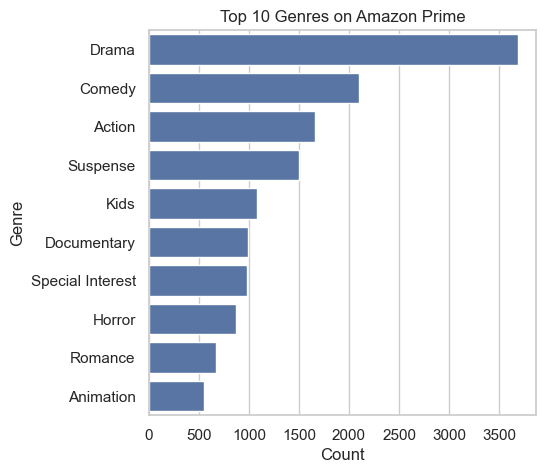

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


### Insight:
Drama and Comedy are the most dominant genres, suggesting strong user
preference for narrative and entertainment-driven content.


## 8. Rating Distribution
Understanding content maturity and audience targeting.


In [14]:
top_ratings = df['rating'].value_counts().head(10)
top_ratings


rating
13+          2117
16+          1547
ALL          1268
18+          1243
R            1010
PG-13         393
7+            385
Not Rated     337
PG            253
NR            223
Name: count, dtype: int64

### Insight:
The majority of content falls under general and parental guidance ratings,
indicating a family-friendly content strategy.


## 9. Language Distribution
Analyzing the most common languages used in content.


In [27]:
print(df.columns)

top_languages = (
    df['listed_in']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

print(top_languages)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
listed_in
Drama               3687
Comedy              2099
Action              1657
Suspense            1501
Kids                1085
Documentary          993
Special Interest     980
Horror               875
Romance              674
Animation            547
Name: count, dtype: int64


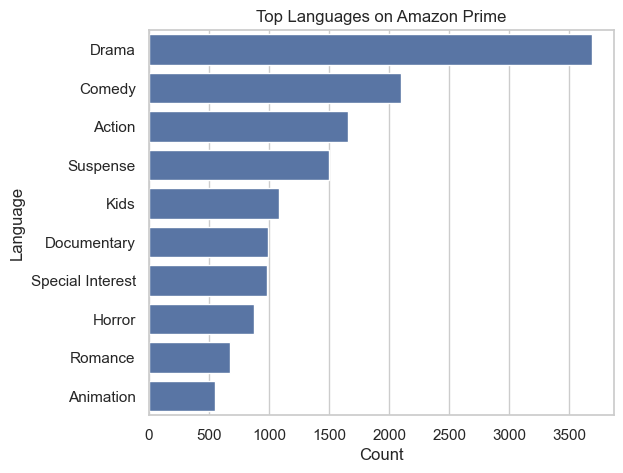

In [38]:
plt.figure(figsize=(6,5))
sns.barplot(x=top_languages.values, y=top_languages.index)
plt.title("Top Languages on Amazon Prime")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()


### Insight:
English dominates the platform, but there is noticeable multilingual
content, indicating growing regional diversification.


## 10. Content Release Trend Over Time
Analyzing how content availability has evolved over the years.


In [29]:
yearly_content = df['release_year'].value_counts().sort_index()
yearly_content.tail(10)


release_year
2012     252
2013     289
2014     391
2015     378
2016     521
2017     562
2018     623
2019     929
2020     962
2021    1442
Name: count, dtype: int64

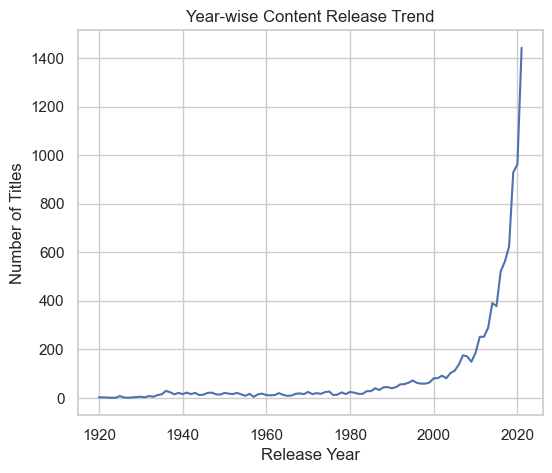

In [41]:
plt.figure(figsize=(6,5))
plt.plot(yearly_content.index, yearly_content.values)
plt.title("Year-wise Content Release Trend")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


### Insight:
There is a sharp increase in content releases after 2015,
highlighting Amazon Prime’s aggressive content expansion strategy.


## 11. Content Release on countries
Analyzing how content availability has evolved over the countries.


In [31]:
df['country'].value_counts().head(10)


country
Unknown                          8996
United States                     253
India                             229
United Kingdom                     28
Canada                             16
United Kingdom, United States      12
Spain                               8
Italy                               8
Canada, United States               7
United States, United Kingdom       6
Name: count, dtype: int64

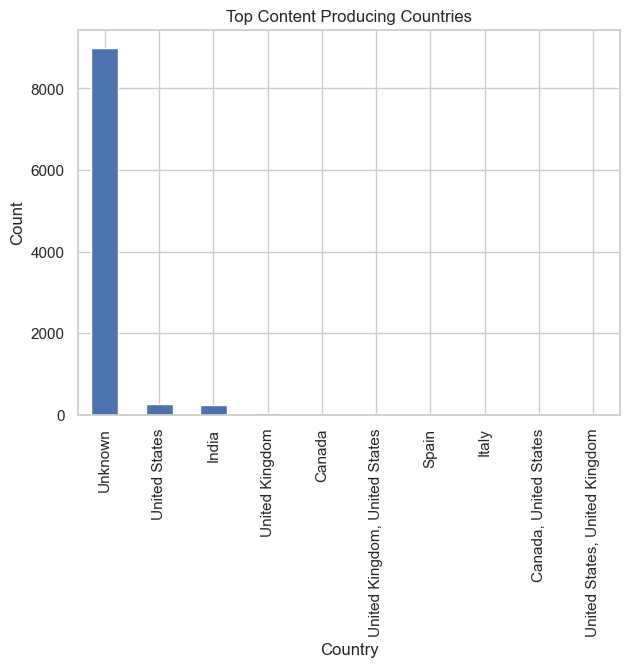

In [36]:
plt.figure(figsize=(7,5))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top Content Producing Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


### Insight:
The United States contributes the highest number of titles,
indicating a strong North American content focus.


## Key Findings
- Movies form the majority of the Amazon Prime content library.
- Drama and Comedy are the most popular genres.
- English is the dominant language across the platform.
- Content releases increased significantly after 2015.
- The platform focuses largely on family-friendly ratings.


## Conclusion & Recommendations
Amazon Prime Video has built a movie-dominated, genre-diverse content
library with strong growth in recent years.

### Recommendations:
- Increase regional and multilingual content to expand global reach.
- Invest more in TV shows to balance engagement.
- Continue focusing on popular genres while experimenting with niche content.
